# Estimating Stochastic Volatility Model with Linear Kalman Filter

# Literature and/or Audio

https://www.youtube.com/playlist?list=PLyQSjcv8LwAGvIw2KNX6IelIIJ5SQDYZZ

# 0. Univariate SVM for Demeand Returns (from our first day of Vol class)

\begin{align*}
r_t  &:=  \sigma_t \, \times  \, \xi_t; \quad \xi_t \, \sim \,  N (0,1)  \\\\
\sigma_{t} &:=  \bar{\sigma} \, \times \, e^{\frac{1}{2} \, h_t} \\\\
h_{t}&=\phi h_{t-1}+\eta_{t}, \quad \eta_{t}\sim N (0,\, \sigma_{\eta}^{2}), \quad h_{0}\sim N(0,\ \sigma_{\eta}^{2}/(1-\phi^{2}))
\end{align*}

# A. Harvey et al. (1993) Transform of Univariate SVM

Harvey et al. (1993) estimates factor structure in the volatility of exchange rates. An SVM approach allows a more convenient factor structure modeling as GARCH approaches.

$$
\\
$$

https://www.researchgate.net/publication/4995466_Multivariate_Stochastic_Variance_Models

$$
\\
$$

\begin{align*}
&ME: \quad \ln r^2_t = -1.27 + \ln \bar{\sigma}^2 + h_t + \epsilon_t, \quad \epsilon_t \sim N(0,\frac{\pi^2}{2}) \\\\
&SE: \quad h_t  = \phi \times h_{t-1} + \eta_t, \quad \eta_t \sim N(0,\sigma^2_{\eta}).
\end{align*}

$$
\\
$$

**Unknown parameters:**

$$
\{ln \bar{\sigma}^2, \, \phi, \, \sigma^2_{\eta} \} \in \theta.
$$

$$
\\
$$

**Training data:**
    
$$
\{r_t\}_{t \in [1,2,...,T]}.
$$

$$
\\
$$

**Joint log likelihood function:**
$$
\\
$$

\begin{align*}
ln\, L_T(\theta) &= -\frac{1}{2} \sum_{t=1}^T \left( ln\,(2 \pi) + ln\,( Var(ln \,r^2_t|\mathcal{F}_{t-1}) ) \right) \\\\
&-\frac{1}{2} \sum_{t=1}^T \frac{\left( ln\, r^2_t - E[ln\, r^2_t|\mathcal{F}_{t-1}] \right)^2}{Var(ln \,r^2_t|\mathcal{F}_{t-1})}
\end{align*}

$$
\\
$$

**with:**
    
\begin{align*}
E[ln\, r^2_t|\mathcal{F}_{t-1}] &= -1.27 + \ln \bar{\sigma}^2 + E[h_t|\mathcal{F}_{t-1}] \\\\
%
Var(ln \,r^2_t|\mathcal{F}_{t-1}) &= Var(h_t|\mathcal{F}_{t-1}) + \frac{\pi^2}{2}.
\end{align*}    

$$
\\
$$

The respective terms for **$E[h_t|\mathcal{F}_{t-1}]$ and $Var(h_t|\mathcal{F}_{t-1})$ are the output from a Kalman Filter recursion**.

# B. Expectation Maximization Algorithm

$$
\\
$$

**First, we initialize,  the running index $t$, the prior for the kalman filter and the log likelihood.**


\begin{align*}
t &= 1 \\\\
E[h_1|\mathcal{F}_0] &= 0 \\\\
Var(h_1|\mathcal{F}_0) &= e^{12}\\\\
lnL = 0.
\end{align*}


$$
\\
$$

**Second, we run a e.g. a'while loop'**

$$
\\
$$

$while$ $t \in \{1,2,...,T\}$, do the following
\begin{align*}
& \{ \\\\
& Var(ln \, r^2_t|\mathcal{F}_{t-1}) = Var(h_t| \mathcal{F}_{t-1}) + \frac{\pi^2}{2} \\\\
& K_t = \frac{ Var(h_t| \mathcal{F}_{t-1}) }{Var(ln \, r^2_t|\mathcal{F}_{t-1})} \\\\
& v_t = ln \, r^2_t - E[ln \, r^2_t|\mathcal{F}_{t-1}] \quad \text{with} \; E[\ln \, r^2_t|\mathcal{F}_{t-1}] = -1.27 + \ln \bar{\sigma}^2 + E[h_t|\mathcal{F}_{t-1}]\\\\
& lnL_t = -\frac{ln\ (2 \pi)}{2} - \frac{1}{2} ln\, (Var(ln \, r^2_t|\mathcal{F}_{t-1})) - \frac{1}{2} \;\frac{v^2_t}{Var(ln \, r^2_t|\mathcal{F}_{t-1})}\\\\
&lnL \;= lnL + lnL_t \\\\
& E[h_t|\mathcal{F}_t] =  E[h_t|\mathcal{F}_{t-1}] + K_t \times v_t \\\\
& Var(h_t|\mathcal{F}_t) = Var(h_t|\mathcal{F}_{t-1}) \, \times \, (1-K_t) \\\\
& E[h_{t+1}|\mathcal{F}_t] = \phi \times E[h_t|\mathcal{F}_t] \\\\
& Var(h_{t+1}|\mathcal{F}_t) = \phi^2 Var(h_t|\mathcal{F}_t) + \sigma^2_{\eta} \\\\
& t = t+1\\\\
& \}
 \end{align*}

# B. Visualization using Python

### load daily return data from csv file

In [1]:
import pandas as pd

In [2]:
r_d = pd.read_csv('r_ES50_d_cleaned_realized_Nov2020.csv', parse_dates=["Date"], index_col=0) #Date information is stored in column "Date". # index_col=0 sets "Date" as the index. This is required to use rich functionality of DATE_TIME

In [3]:
r_d.head()

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.023996,-0.009332,-0.004736,-0.100229,-0.015385,-0.022708,-0.024598,-0.038939,-0.026907,-0.019987,...,-0.042903,-0.034424,-0.047851,-0.025479,-0.000945,0.021525,0.022467,-0.024392,-0.037946,-0.024012
2000-01-06,0.041964,0.069408,0.040316,-0.072511,-0.007783,0.006279,0.000000,0.003755,0.003403,-0.003249,...,0.049442,-0.012306,0.000874,-0.029462,0.029561,0.036187,0.032790,-0.011798,-0.004413,0.005492
2000-01-07,-0.013793,-0.012318,0.027432,0.072005,0.030773,0.006240,0.043328,0.040197,0.040830,-0.001810,...,0.018089,0.039441,0.000873,0.004971,-0.006212,0.014364,0.031750,0.008088,0.028438,0.024450
2000-01-10,0.015025,-0.035451,0.005750,0.069533,0.000000,-0.016227,-0.008872,0.004390,0.035670,0.039081,...,-0.016786,0.057803,0.029700,0.000826,0.010789,-0.011506,-0.042558,0.086030,0.002800,0.010916
2000-01-11,-0.009347,-0.009217,-0.009157,0.012224,-0.022990,-0.020279,-0.034456,-0.045421,-0.030031,-0.003490,...,-0.039170,0.006872,0.000849,0.007404,0.004556,-0.012549,0.042558,0.018587,0.015535,-0.004902


### Python Package for SVM Estimation

In [4]:
#requires: pip install ipynb --upgrade
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV

**Fit the model to 1/N "demeand" returns**

In [5]:
SVM        = QLSV(r_d["1/N"] - r_d["1/N"].mean())

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [6]:
SVM_result = SVM.fit(cov_type='robust')

In [7]:
# Print the estimation summary
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                    1/N   No. Observations:                 5383
Model:                           QLSV   Log Likelihood              -12253.655
Date:                Fri, 11 Dec 2020   AIC                          24513.310
Time:                        11:15:20   BIC                          24533.083
Sample:                             0   HQIC                         24520.214
                               - 5383                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9844      0.004    280.713      0.000       0.978       0.991
sigma2_eta     0.0307      0.007      4.678      0.000       0.018       0.044
mu            -9.1340      0.159    -57.627      0.0

In [26]:
dir(SVM_result) 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_fixed_params',
 '_fixed_params_index',
 '_free_params_index',
 '_get_robustcov_results',
 '_has_fixed_params',
 '_rank',
 '_states',
 '_use_t',
 'aic',
 'aicc',
 'append',
 'apply',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_params_approx',
 'cov_params_default',
 'cov_params_oim',
 'cov_params_opg',
 'cov_params_robust',
 'cov_params_robust_approx',
 'cov_params_robust_oi

**Plot Measurement Equation**

In [8]:
r_dm_eqw = r_d["1/N"] - r_d["1/N"].mean()

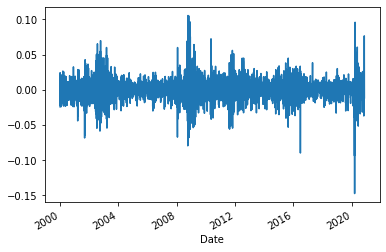

In [9]:
r_dm_eqw.plot()

In [10]:
import numpy as np
ln_r2_dm_eqw = np.log(r_dm_eqw**2)

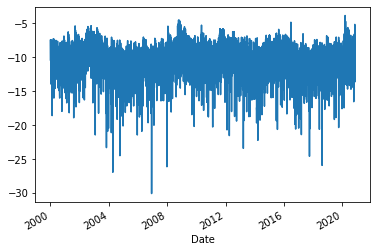

In [11]:
ln_r2_dm_eqw.plot()

**Check that Helper_SVM_Harvey Notation produces same result for $\bar{\sigma}$ than my notation from above**

i.e. can be ignored

In [12]:
ln_r2_dm_eqw.mean()

-10.42105361252034

In [13]:
sigma2_bar_approx = np.exp(ln_r2_dm_eqw.mean() + 1.27)

In [14]:
print(sigma2_bar_approx )

0.0001061509616080967


In [15]:
sigma_bar_approx = np.sqrt(sigma2_bar_approx)

In [16]:
print(sigma_bar_approx)

0.010302958876366376


In [17]:
np.exp(0.5*(-9.14))

0.010357959717613696

In [18]:
0.01035*np.sqrt(252)*100

16.430115641711108

### Conditional Vol

**conditonal vol of SVM implied return model**

In [13]:
import numpy as np

SVM_condVol_eqw = np.exp(SVM_result.smoothed_state[0] / 2)

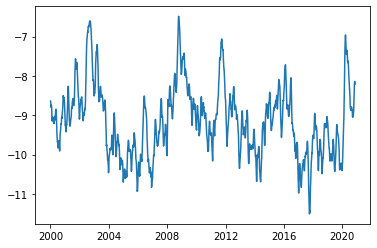

In [14]:
#plot h_t
import matplotlib.pylab as plt
plt.plot(r_d.index, SVM_result.smoothed_state[0] )

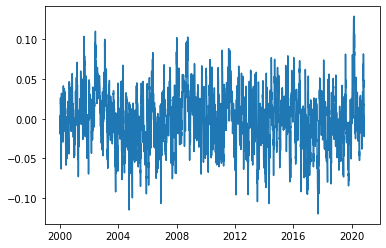

In [15]:
#plot eta_t, i.e. shocks to h_t
import matplotlib.pylab as plt
plt.plot(r_d.index, SVM_result.smoothed_state_disturbance[0] )

### Plot

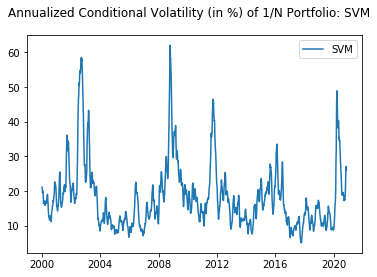

In [16]:
import matplotlib.pylab as plt

fig,ax1 = plt.subplots()
fig.suptitle('Annualized Conditional Volatility (in %) of 1/N Portfolio: SVM')
ax1.plot(r_d.index, SVM_condVol_eqw*100 * np.sqrt(252), label='SVM')
leg = ax1.legend();
plt.show()

# Application: Does SVM Vol follow a low dimensional factor structure?

In [17]:
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV

In [18]:
import numpy as np

In [19]:
SVM_Vol_r = r_d.copy()

In [20]:
#loop
for i in range(0,r_d.shape[1]):
    SVM = QLSV(r_d.iloc[:,i] - r_d.iloc[:,i].mean())
    SVM_result = SVM.fit(cov_type = 'robust')
    SVM_Vol_r.iloc[:,i] = np.exp(SVM_result.smoothed_state[0] / 2)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has

**Plot of Cross-Sectional Vol**

Text(0.5, 1.0, 'Dails SVM Vol of Euro-Area Blue Chips')

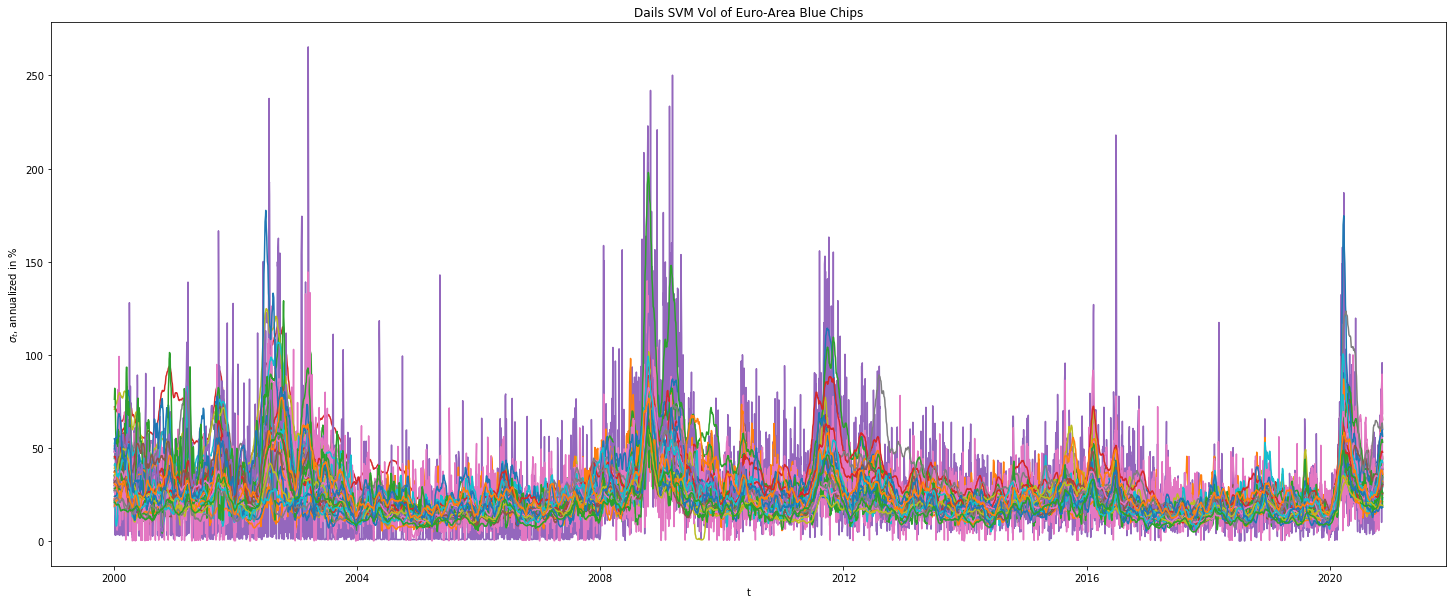

In [21]:
import numpy as np
import matplotlib.pylab as plt

plt.figure(figsize=(25,10))
plt.plot(r_d.index, SVM_Vol_r*np.sqrt(252)*100)
plt.xlabel('t')
plt.ylabel('$\sigma_t$, annualized in %')
plt.title('Dails SVM Vol of Euro-Area Blue Chips')

**PCA on Cross-Sectional Vol (i.e. using normalized variance)**

In [22]:
from scipy import stats
from sklearn.decomposition import PCA


In [23]:
pca_n = PCA().fit(stats.zscore(SVM_Vol_r.iloc[:,0:r_d.shape[1]-1]**2))

In [24]:
i=4
print(pca_n.explained_variance_ratio_[:i])

[0.57917565 0.10673878 0.04058818 0.02987899]


In [ ]:
#get PCs
PCs_ = pca_n.transform(stats.zscore(SVM_Vol_r.iloc[:,0:r_d.shape[1]-1]**2))

**Plot first three PCs with $Var_{r_{1/N}}$**

In [ ]:
import matplotlib.pylab as plt

In [ ]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Factors Driving EU Blue Chip Return Variance, i.e. SVM (Normalized)')
ax1.plot(r_d.index, PCs_[:,0])
ax1.set_title("PC1_ ")
ax2.plot(r_d.index, PCs_[:,1])
ax2.set_title("PC2_ ")
ax3.plot(r_d.index, PCs_[:,2])
ax3.set_title("PC3_ ")
ax4.plot(r_d.index, SVM_Vol_r["1/N"]**2)
ax4.set_title("Variance of MKT")
plt.show()

**Correlation PC1 and Var of Equal-Weight Portfolio**

In [ ]:
import numpy
np.corrcoef(SVM_Vol_r["1/N"]**2, PCs_[:,0])

**Plot PC1 and Var of Equal-Weight Portfolio**

In [ ]:
import matplotlib.pylab as plt

fig,ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('z ( Var$(r_{1/N}) )$ and PC1(Var(r))')
ax1.plot(r_d.index, stats.zscore(SVM_Vol_r["1/N"]**2), label ='MKT Variance, z-score' )
ax1.plot(r_d.index, stats.zscore(PCs_[:,0 ]), alpha=0.9, label = 'PC1(Var(r))-zscore')

leg = ax1.legend();